In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import requests

# Загрузка данных
data = pd.read_csv('../data/_data.csv')

pd.set_option('display.max_columns', 30) 
# Просмотр первых нескольких строк данных
data.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [3]:
# Удаляем неиформативные столбцы
data = data.drop(['Unnamed: 0', 'Телефоны', 'Тип', 'Телефоны', 'Балкон', 'Окна', 'Санузел', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт','Мусоропровод', 'Ссылка на объявление'], axis = 1)

In [4]:
# 2 Нормируем и заполняем данными столбец Количество комнат

# Функция для очистки строки, оставляющая только цифры
def extract_digits(text):
    digits = re.findall(r'\d+', str(text))  # Находим все цифры в строке
    return ''.join(digits)  # Объединяем найденные цифры в одну строку

# Очищаем столбец "Количество комнат"
data['Количество комнат'] = data['Количество комнат'].apply(extract_digits)

# Заполняем пустые значения в столбце "Количество комнат" из столбца "Площадь комнат, м2"
data['Количество комнат'] = data['Количество комнат'].fillna(data['Площадь комнат, м2'].apply(extract_digits))

# Удаляем столбец Площадь комнат
data = data.drop(['Площадь комнат, м2'], axis = 1)

In [5]:
# 4 Нормируем и заполняем данными столбец Метро

def extract_minutes(text):
    match = re.search(r'\((\d+)\s*мин\s*пешком\)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

# Применяем функцию для извлечения числовых значений
data['Метро'] = data['Метро'].apply(extract_minutes)

# Преобразуем столбец в числовой формат
data['Метро'] = pd.to_numeric(data['Метро'], errors='coerce')

# Заполняем пропущенные значения медианой
median_value = data['Метро'].median()
data['Метро'] = data['Метро'].fillna(median_value)

In [6]:
# 5 Нормируем столбец Адрес

#оставляю адреса, где в адресе только Москва
data = data[data['Адрес'].str.contains("Москва")].reset_index(drop = True)

In [7]:
# 6 Нормируем столбец Площадь

# Функция для извлечения первого значения из строки
def extract_first_value(text):
    values = str(text).split('/')  # Разделяем строку по символу "/"
    return values[0].strip()  # Возвращаем первое значение, удаляя лишние пробелы

# Применяем функцию к столбцу "Площадь, м2"
data['Площадь, м2'] = data['Площадь, м2'].apply(extract_first_value)

In [8]:
# 7 Нормируем столбец Дом

# Разбиваем колонку дом на 2 колонки 'Этажность дома', 'Этаж квартиры'

data['Этажность дома'] = [int(row.split('/')[1].split(',')[0]) for row in data['Дом']]
data['Этаж квартиры'] = [int(row.split('/')[0]) for row in data['Дом']]
df = data.drop(['Дом'], axis = 1)

del data['Дом']


In [9]:
# 8 Нормируем столбец Парковка

#обрабатываю колонку Парковку, привожу к числовому значению 
data['Парковка'] = data['Парковка'].fillna(0).replace({'подземная': 1, 'наземная': 1, 'открытая': 1, 'многоуровневая': 1, 'на крыше': 1})

/var/folders/9t/wl_kk32j6wq2kw0m3bv0rp1h0000gn/T/ipykernel_2432/311525222.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Парковка'] = data['Парковка'].fillna(0).replace({'подземная': 1, 'наземная': 1, 'открытая': 1, 'многоуровневая': 1, 'на крыше': 1})


In [10]:
# 9 Нормируем столбец Цена

from forex_python.converter import CurrencyRates

# Создаем экземпляр класса CurrencyRates
c = CurrencyRates()

# Функция для конвертации цен в рубли
def convert_currency(price, currency):
    if currency == 'руб.,':
        return float(price)
    elif currency == '$,':
        return round(c.convert('USD', 'RUB', float(price)), 2)
    elif currency == '€,':
        return round(c.convert('EUR', 'RUB', float(price)), 2)
    else:
        # Если валюта не распознана, возвращаем None
        return None

# Применяем функцию к столбцу 'Цена' в DataFrame
df['Цена'] = df.apply(lambda row: convert_currency(row['Цена'].split(' ')[0], row['Цена'].split(' ')[1]), axis=1)



# Отдельная колонка про коммунальные услуги, пропущенные значения заменил 0 + в колонке 'Цена' оставил только цену за месяц                                   

def extract_info(text):
    match = re.search(r'(Коммунальные услуги включены)', str(text))
    return 1 if match else 0

data1 = data

# data1['Коммунальные услуги'] = data['Цена'].apply(extract_info)
# data1['Коммунальные услуги'] = data['Коммунальные услуги']. fillna (0)

data1['Цена']=data['Цена'].str.split().str[0]
data1['Цена']=data['Цена'].astype(float)

In [11]:
# 12 Нормируем столбец Ремонт

#Заполняем пропущенные значения
data['Ремонт'] = data['Ремонт'].fillna('Не указан')

# Переписываем данные про ремонт в ту же колонку: 
repair_mapping = {
    'Дизайнерский': 2,
    'Евроремонт': 1,
    'Косметический': 0,
    'Без ремонта': 0,
    'Не указан': 1
}

#Так как в результате исследования мы выяснили, что медианная цена у 'Не указан' и 'Евроремонт' практически одинаковая, 
# то мы объединили их в одну переменную для дальнейшего анализа

data['Ремонт'] = data['Ремонт'].map(repair_mapping)

In [12]:
# 17 Нормируем столбец Можно с детьми/животными

# Заменил все возможные 'можно' в оригинальной колонке на 1, пропущенные значения на 0

def replace_children_pets(text):
    match = re.search(r'(Можно)', str(text))
    if match:
        return '1'
    else:
        return None

data1['Можно с детьми/животными'] = data['Можно с детьми/животными'].apply(replace_children_pets)
data1['Можно с детьми/животными'] = data['Можно с детьми/животными'].fillna(0)

In [13]:
# 18 Нормируем столбец Дополнительно

# Определение моды (наиболее частого значения) для столбца 'Дополнительно'
mode_value = data['Дополнительно'].mode()[0]

# Заполнение пустых ячеек в столбце 'Дополнительно' значением моды
data['Дополнительно'] = data['Дополнительно'].fillna(mode_value)


In [14]:
# Преобразуем столбцы в числовой формат
data['Площадь, м2'] = pd.to_numeric(data['Площадь, м2'], errors='coerce')
data['Цена'] = pd.to_numeric(data['Цена'], errors='coerce')

# Удаляем выбросы
data = data[data['Площадь, м2'] < 750]
data = data[data['Цена'] < 1000000000]
data = data[data['Этажность дома'] < 200].reset_index(drop = True)

In [16]:
# Создаем словарь, в котором ключи - это старые названия столбцов, а значения - новые названия
new_column_names = {
    'ID объявления': 'listing_id',
    'Количество комнат': 'number_of_rooms',
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'area_sqm',
    'Парковка': 'parking',
    'Цена': 'price',
    'Описание': 'description',
    'Ремонт': 'renovation',
    'Можно с детьми/животными': 'pet/child_allowed',
    'Дополнительно': 'additional_info',
    'Этаж квартиры': 'floor',
    'Этажность дома': 'total_floors',
    'Коммунальные услуги': 'utilities',
    'Тип дома': 'type_house'
}

# Изменяем названия столбцов, используя метод rename() с аргументом columns
data = data.rename(columns=new_column_names)

# Выводим первые строки датасета для проверки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19732 entries, 0 to 19731
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID  объявления     19732 non-null  int64  
 1   number_of_rooms    19732 non-null  object 
 2   metro              19732 non-null  float64
 3   address            19732 non-null  object 
 4   area_sqm           19732 non-null  float64
 5   parking            19732 non-null  int64  
 6   price              19732 non-null  float64
 7   description        19732 non-null  object 
 8   renovation         19732 non-null  int64  
 9   pet/child_allowed  19732 non-null  object 
 10  additional_info    19732 non-null  object 
 11  total_floors       19732 non-null  int64  
 12  floor              19732 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


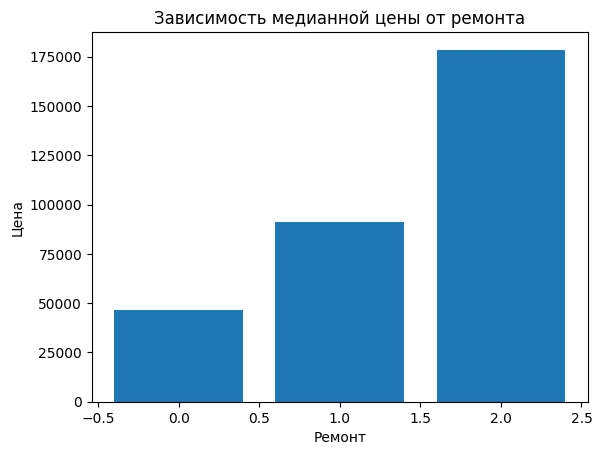

In [17]:
#Сделали группировку ремонта по медианной цене
renov = data.groupby('renovation',as_index = False).agg({'price':'mean'}).sort_values('price',ascending = False).head(5)


plt.bar(renov['renovation'],renov['price'])
plt.xlabel('Ремонт')
plt.ylabel('Цена')
plt.title('Зависимость медианной цены от ремонта')
plt.show()

#По этому bar chart мы отчетливо видим, что цена на медианная цена квартиры с дизайнерским ремонтом выше евро и "не указан",  
#а цена квартир с косметическим ремонтом и без ремонта, самая низкая.
#Эта колонка репрезентативна и мы можем ее использовать для дальнейшей работы.

In [18]:
data.columns = ['listing_id'] + list(data.columns[1:])

#удаляем колонку 'description'
data = data.drop(columns=['description'])

# Преобразуем столбцы в числовой тип данных
data['number_of_rooms'] = pd.to_numeric(data['number_of_rooms'], errors='coerce')
data['pet/child_allowed'] = pd.to_numeric(data['pet/child_allowed'], errors='coerce')


# Вычислить моду и среднее значение для столбца number_of_rooms
mode_value = data['number_of_rooms'].mode()[0]  # мода


# Заменить некорректные значения на моду или среднее значение
data.loc[~data['number_of_rooms'].apply(lambda x: str(x).isdigit()), 'number_of_rooms'] = mode_value

In [19]:
# Удаляем дубликаты
data_unique = data.drop_duplicates()

# Выводим информацию о количестве удаленных дубликатов
print("Количество удаленных дубликатов:", len(data) - len(data_unique))

Количество удаленных дубликатов: 0


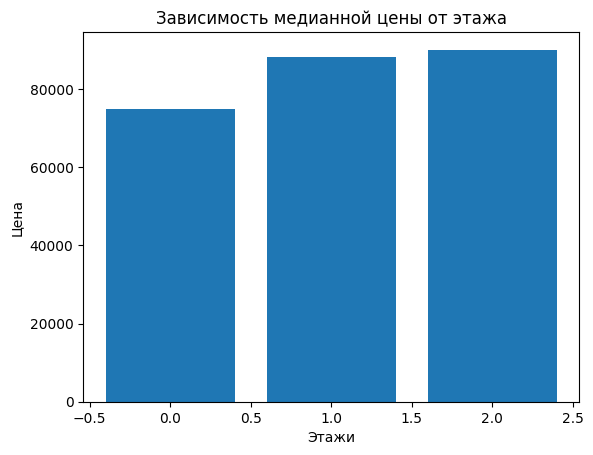

In [20]:
#Исследуем отношение цены к этажу дома. По нашей теории квартиры на нижних этажах и на верхних этажах должны быть дешевле.
#Так как на нижних этажах более шумно и могут идти запахи с улицы. На верхних может протекать крыша, нет лифта либо тяжелее добираться в случае его поломки. Тяжелее добираться, если нет лифта.
# За пример взяли девятиэтажный дом, где 1,2 и 8,9 этажи - дешевле. 2/9 - 22.2%(до), 8/9 - 88.8%(после) - до/после такого процента этажей квартира будет дешевле

#Создаем колонку
data['percentage'] = data['floor'] / data['total_floors'].astype(float)
data

#Создаем функцию замены

def replace_dig(digit):
    if digit >= 0.888:
        return 2
    elif digit <= 0.222:
        return 0
    else:
        return 1

# Применяем функцию к столбцу "percentage"
data['percentage'] = data['percentage'].apply(replace_dig)

#Делаем группировку по медианной цене
floor_rate = data.groupby('percentage',as_index = False).agg({'price':'mean'}).sort_values('price',ascending = False).head(5)

plt.bar(floor_rate['percentage'],floor_rate['price'])
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.title('Зависимость медианной цены от этажа')
plt.show()

data = data.drop(['total_floors', 	'floor'], axis = 1)

#Результаты исследования показывают, что медианная цена на нижние этажи (ниже 22% высоты дома) действительно ниже. 
#В то время как медианная цена на "средние" и самые высокие не отличается. 
#На наш взгляд эти результаты репрезентативны и мы можем их использовать для дальнейшего исследования

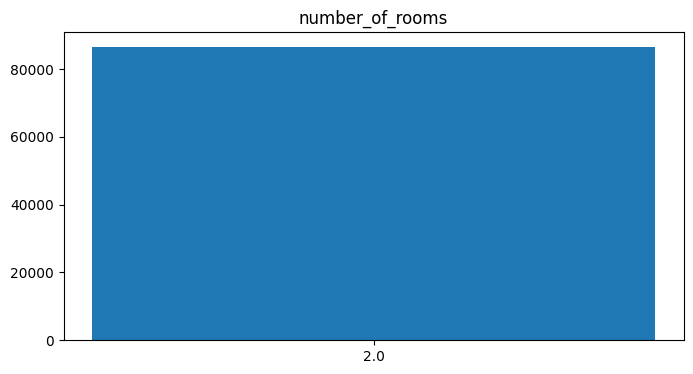

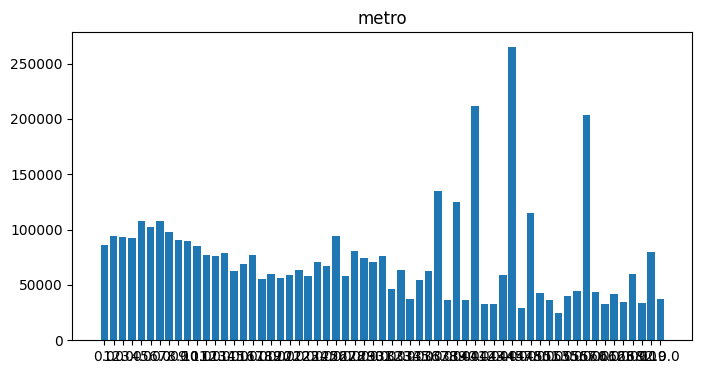

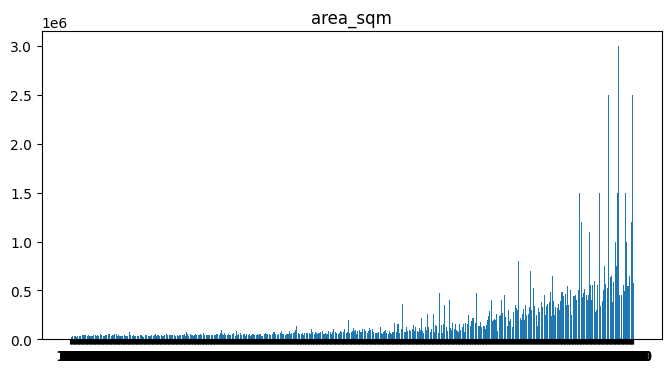

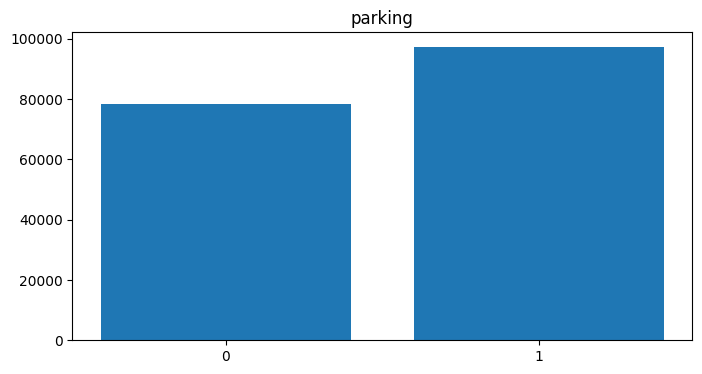

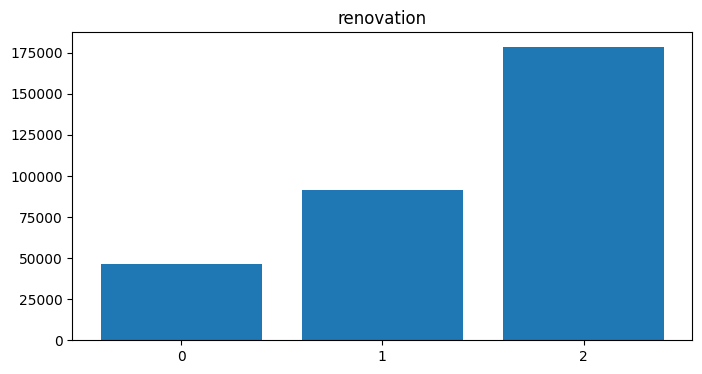

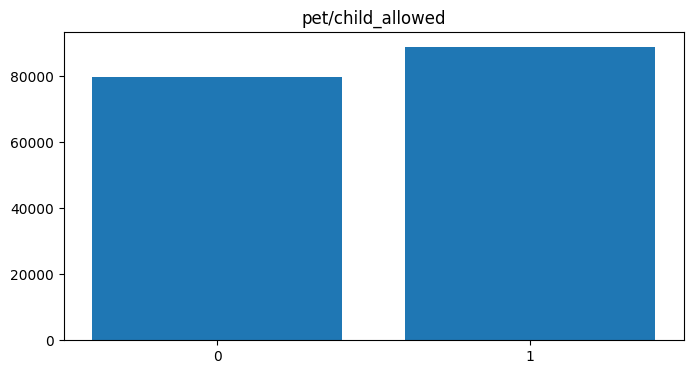

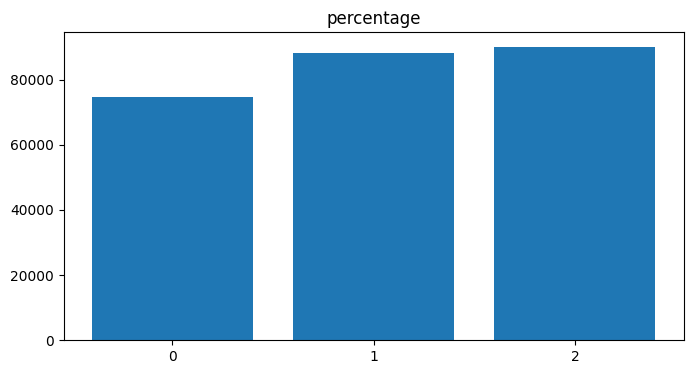

In [21]:
# Отрисовка графиков 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_mean_price(column):
    plt.figure(figsize=(8, 4)) 
    n_bars = np.arange(len(data[column].unique())) 
    
    grouped = pd.DataFrame(data.groupby([column])['price'].mean().round())
    
    plt.title(column) 
    plt.bar(n_bars[:len(grouped)], grouped['price'])  
    plt.xticks(n_bars[:len(grouped)], grouped.index)
    plt.show()

categorical = ['number_of_rooms', 'metro', 'area_sqm', 'parking', 'renovation', 'pet/child_allowed', 'percentage']
       
for col in categorical:
    plot_mean_price(col)


In [22]:
# df = pd.DataFrame(data)

# # Вычислим матрицу корреляции
# corr_matrix = df.corr()

# # Нарисуем тепловую карту
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Корреляционная матрица признаков')
# plt.show()

In [23]:
# Сохранение изменений в новый файл
data.to_csv('../data/data.csv', index=False, sep='\t')

In [24]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm

In [78]:
# Создаем пустой список для хранения координат
coordinates_list = []

# Функция для преобразования адреса в координаты
def do_geocode(address, attempt=1, max_attempts=5):
    try:
        location = Nominatim(user_agent="my_request").geocode(address, timeout=None)
        if location is not None:
            coordinates_list.append((location.latitude, location.longitude))
        else:
            coordinates_list.append((None, None))  # Если координаты не найдены, добавляем None
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

# Проходимся по каждой строке в датасете и преобразуем адрес в координаты
for address in tqdm(data['address']):
    try:
        do_geocode(address)
    except:
        coordinates_list.append((None, None))  # Если возникла ошибка, добавляем None

# Добавляем список координат в датасет
data['coordinates'] = coordinates_list

  1%|          | 176/19732 [01:34<2:39:49,  2.04it/s]

: 

: 

In [26]:
data

# # Координаты центра Москвы (Кремль)
# kremlin_coords = (55.75141, 37.61896)

# # Функция для вычисления расстояния до центра Москвы
# def calculate_distance(coord):
#     if coord[0] is None or coord[1] is None:
#         return None
#     return round(geodesic(coord, kremlin_coords).km, 2)

# # Применяем функцию ко всем координатам в датасете
# data['distance_to_center'] = data['coordinates'].apply(calculate_distance)

# # Удаляем строки с пустыми координатами или расстоянием
# data = data.dropna(subset=['coordinates', 'distance_to_center']).reset_index(drop=True)

# # Выводим обновленный датафрейм
# data.head()

,listing_id,number_of_rooms,metro,address,area_sqm,parking,price,renovation,pet/child_allowed,additional_info,percentage
0,271271157,2.0,9.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,2,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",1
1,271634126,2.0,8.0,"Москва, улица Новый Арбат, 27",198.0,1,500000.0,2,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",1
2,271173086,2.0,7.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,1,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",1
3,272197456,2.0,3.0,"Москва, переулок Плотников, 21С1",170.0,1,400000.0,1,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",1
4,273614615,2.0,7.0,"Москва, улица Новый Арбат, 15",58.0,0,225000.0,1,0,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",1
...,...,...,...,...,...,...,...,...,...,...,...
19727,215565511,2.0,8.0,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,0,42000.0,1,0,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",1
19728,274654844,2.0,7.0,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,0,45000.0,1,0,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",1
19729,268679909,2.0,6.0,"Москва, Боровский проезд, 11",43.1,0,50000.0,2,1,"Мебель на кухне, Душевая кабина, Стиральная ма...",2
19730,274807525,2.0,11.0,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,1,55000.0,1,0,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",1
